# Shopee case
This notebook refers to a case for the position of Jr Finance Data Analyst at Shopee.


We chose to use python to write the codes, because it is easier to visualize the dataframes while transforming them and due to the possibility of better presenting the solution in a notebook.

# Importing and reading the data
- Firstly, we will import pandas library to transform the dataframes.
- Secondly, we will read the dataframes, which are in CSV format.
- Thirdly, we will display the firts 5 rows of the dataframes.
- Finally, we will identify the data types of the dataframes.

In [ ]:
import pandas as pd #importing pandas for data manipulation

In [ ]:
df1 = pd.read_csv('/content/dataframe_1.csv', sep=",", parse_dates=['delivery_date']) #reading the csv file
df1.head() #viewing the first 5 rows from the first dataframe

,order_id,delivery_date,shop_name,amount
0,41134,2022-01-03,Radiance Boutique,42.66
1,48238,2022-01-02,Swap Shop,19.63
2,78773,2022-01-04,Acorn Crafts,10.75
3,65009,2022-01-05,GameDay Catering,49.91
4,89000,2022-01-03,Acorn Crafts,32.99


In [ ]:
df2 = pd.read_csv('/content/dataframe_2.csv', sep=",", parse_dates=['delivery_date']) #reading the three remaining csv files
df3 = pd.read_csv('/content/dataframe_3.csv', sep=",", parse_dates=['delivery_date'])
df4 = pd.read_csv('/content/dataframe_4.csv', sep=",", parse_dates=['delivery_date'])

In [ ]:
df2.head() #viewing the first 5 rows from the second dataframe

,order_id,delivery_date,shop_name,amount
0,79862,2022-01-04,Radiance Boutique,44.74
1,38506,2022-01-03,Pizza Factor,15.37
2,98586,2022-01-01,Swap Shop,37.07
3,28835,2022-01-02,Aloha Art,23.68
4,49173,2022-01-02,Party Plex,39.33


In [ ]:
df3.head() #viewing the first 5 rows from the third dataframe

,order_id,delivery_date,shop_name,amount
0,33319,44562,Aloha Art,20.55
1,85406,44593,Party Plex,"44,5"
2,58727,44562,Acorn Crafts,43.14
3,85406,44652,GameDay Catering,"15,97"
4,85406,44593,Swap Shop,"19,84"


In [ ]:
df4.head() #viewing the first 5 rows from the fourth dataframe

,order_id,delivery_date,shopname,amount
0,80366,2022-01-03,Pizza Factor,22.06
1,80366,2022-01-04,Radiance Boutique,39.1
2,49525,2022-01-05,GameDay Catering,33.87
3,58405,2022-01-05,Castaway Shop,"47,52"
4,80366,2022-01-04,Spa Paragon,"48,74"


In [ ]:
df1.info() #viewing the info of the first dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       29 non-null     int64         
 1   delivery_date  29 non-null     datetime64[ns]
 2   shop_name      29 non-null     object        
 3   amount         29 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [ ]:
df2.info() #viewing the info of the second dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       23 non-null     int64         
 1   delivery_date  23 non-null     datetime64[ns]
 2   shop_name      23 non-null     object        
 3   amount         23 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 864.0+ bytes


In [ ]:
df3.info() #viewing the info of the third dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       31 non-null     int64 
 1   delivery_date  31 non-null     object
 2   shop_name      31 non-null     object
 3   amount         31 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [ ]:
df4.info() #viewing the info of the fourth dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       22 non-null     int64         
 1   delivery_date  22 non-null     datetime64[ns]
 2   shopname       22 non-null     object        
 3   amount         22 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 832.0+ bytes


# Metadata
As we can see, there are 4 columns in the dataframes.
- order_id: the unique identifier for each order; it is an integer and we will keep it as it is.
- delivery_date: the date when the order will be delivered; the format was parsed to datetime64 amidst the reading, except from df3, which has not successfully parsed this column as datetime64.
- shop_name: the name of the shop in which the order was placed; it is an object and we will transform it to string.
- amount: the amount of the order; the format is not standardized, so we will transform it to float in all 4 dataframes.

Firstly, we will standardize the column names of the dataframes.

In [ ]:
df4.columns = ["order_id", "delivery_date", "shop_name", "amount"] #renaming the columns from the fourth dataframe
df4.columns #viewing its columns

Index(['order_id', 'delivery_date', 'shop_name', 'amount'], dtype='object')

Then, we will make the necessary transformations before the type conversions.

In [ ]:
import xlrd #importing xlrd for dealing with serial dates

In [ ]:
df3['delivery_date'] = df3['delivery_date'].astype(float) #converting the serial dates to float
df3['delivery_date'].apply(lambda x: xlrd.xldate_as_datetime(x, 0)) #checking the conversion from serial dates to timestamp

0    2022-01-01
1    2022-02-01
2    2022-01-01
3    2022-04-01
4    2022-02-01
5    2022-02-01
6    2022-03-01
7    2022-05-01
8    2022-05-01
9    2022-03-01
10   2022-05-01
11   2022-04-01
12   2022-05-01
13   2022-01-01
14   2022-04-01
15   2022-01-01
16   2022-02-01
17   2022-05-01
18   2022-02-01
19   2022-01-01
20   2022-02-01
21   2022-02-01
22   2022-05-01
23   2022-03-01
24   2022-03-01
25   2022-05-01
26   2022-03-01
27   2022-02-01
28   2022-04-01
29   2022-03-01
30   2022-01-01
Name: delivery_date, dtype: datetime64[ns]

In [ ]:
df3['delivery_date'] = df3['delivery_date'].apply(lambda x: xlrd.xldate_as_datetime(x, 0)) #converting the serial dates to timestamp

In [ ]:
df3['delivery_date'].astype('datetime64[ns]') #checking the conversion from timestamp to datetime

0    2022-01-01
1    2022-02-01
2    2022-01-01
3    2022-04-01
4    2022-02-01
5    2022-02-01
6    2022-03-01
7    2022-05-01
8    2022-05-01
9    2022-03-01
10   2022-05-01
11   2022-04-01
12   2022-05-01
13   2022-01-01
14   2022-04-01
15   2022-01-01
16   2022-02-01
17   2022-05-01
18   2022-02-01
19   2022-01-01
20   2022-02-01
21   2022-02-01
22   2022-05-01
23   2022-03-01
24   2022-03-01
25   2022-05-01
26   2022-03-01
27   2022-02-01
28   2022-04-01
29   2022-03-01
30   2022-01-01
Name: delivery_date, dtype: datetime64[ns]

In [ ]:
df3['delivery_date'] = df3['delivery_date'].astype('datetime64[ns]') #converting from timestamp to datetime

In [ ]:
df3.info() #viewing the info of the third dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       31 non-null     int64         
 1   delivery_date  31 non-null     datetime64[ns]
 2   shop_name      31 non-null     string        
 3   amount         31 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 1.1 KB


We started using xlrd library to convert the delivery_date column from serial date to timestamp. Then, we used astype to convert it to datetime64.

In [ ]:
df3['amount'].str.replace(',', '.') #checking the replacement of commas with dots

0     20.55
1      44.5
2     43.14
3     15.97
4     19.84
5     15.18
6      43.9
7     19.18
8     27.82
9     28.41
10    48.27
11    28.06
12    12.47
13    19.12
14    20.96
15     18.2
16    46.83
17    10.52
18    38.34
19    29.66
20     39.9
21    13.46
22    12.83
23    29.38
24    41.77
25    23.73
26    25.12
27    34.96
28    46.16
29     16.8
30    31.09
Name: amount, dtype: object

In [ ]:
df3['amount'] = df3['amount'].str.replace(',', '.') #replacing commas with dots
df4['amount'] = df4['amount'].str.replace(',', '.') #replacing commas with dots

In this last step, we replaced the commas in the amount column with dots.

In [ ]:
df_aux = [df1, df2, df3, df4] #creating an auxiliary list with all dataframes

In [ ]:
for df in df_aux: #iterating through the list
  df['amount'] = df['amount'].astype(float) #converting the amount column to float
  df['shop_name'] = df['shop_name'].astype('string') #converting the shop_name column to string

In [ ]:
df1.info() #viewing the info of the first dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       29 non-null     int64         
 1   delivery_date  29 non-null     datetime64[ns]
 2   shop_name      29 non-null     string        
 3   amount         29 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 1.0 KB


In [ ]:
df2.info() #viewing the info of the second dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       23 non-null     int64         
 1   delivery_date  23 non-null     datetime64[ns]
 2   shop_name      23 non-null     string        
 3   amount         23 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 864.0 bytes


In [ ]:
df3.info() #viewing the info of the third dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       31 non-null     int64         
 1   delivery_date  31 non-null     datetime64[ns]
 2   shop_name      31 non-null     string        
 3   amount         31 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 1.1 KB


In [ ]:
df4.info() #viewing the info of the fourth dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       22 non-null     int64         
 1   delivery_date  22 non-null     datetime64[ns]
 2   shop_name      22 non-null     string        
 3   amount         22 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 832.0 bytes


Now all types are standardized and we are ready to merge the dataframes!

# Concatenating the dataframes
At first, we chose to use the full outer join to join the dataframes, as we thought it would be more appropriate to keep the orders that didn't have a corresponding order_id. This way, no information would be lost and there would be nulls in the records that didn't match.

Take a look at the full outer join diagram to get an idea of how it works:

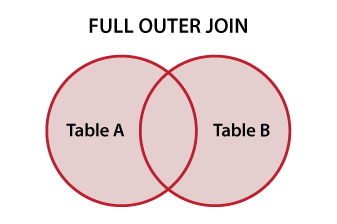

In [ ]:
df1.merge(df2, how='outer', on=['order_id', 'delivery_date', 'shop_name', 'amount']).head() #checking the merge with multiple columns

,order_id,delivery_date,shop_name,amount
0,41134,2022-01-03,Radiance Boutique,42.66
1,48238,2022-01-02,Swap Shop,19.63
2,78773,2022-01-04,Acorn Crafts,10.75
3,65009,2022-01-05,GameDay Catering,49.91
4,89000,2022-01-03,Acorn Crafts,32.99


In [ ]:
df1.merge(df2, how='outer', on=['order_id', 'delivery_date', 'shop_name', 'amount']).isnull().sum() #checking the missing values

order_id         0
delivery_date    0
shop_name        0
amount           0
dtype: int64

In [ ]:
df1.merge(df2, how='outer', on='order_id').head() #checking the merge with order_id

,order_id,delivery_date_x,shop_name_x,amount_x,delivery_date_y,shop_name_y,amount_y
0,41134,2022-01-03,Radiance Boutique,42.66,NaT,<NA>,NaN
1,48238,2022-01-02,Swap Shop,19.63,NaT,<NA>,NaN
2,78773,2022-01-04,Acorn Crafts,10.75,NaT,<NA>,NaN
3,65009,2022-01-05,GameDay Catering,49.91,NaT,<NA>,NaN
4,89000,2022-01-03,Acorn Crafts,32.99,NaT,<NA>,NaN


In [ ]:
df1.shape #checking the shape from the first dataframe

(29, 4)

In [ ]:
df2.shape #checking the shape from the second dataframe

(23, 4)

In [ ]:
df1.merge(df2, how='outer', on=['order_id', 'delivery_date', 'shop_name', 'amount']).shape #checking the shape after the merge

(52, 4)

In [ ]:
df1.merge(df2, how='outer', on=['order_id', 'delivery_date', 'shop_name', 'amount']).drop_duplicates().shape #checking the shape after the merge and after dropping duplicates

(52, 4)

Here, we realized that there is no point in using merge instead of concat, as the columns are the same in both dataframes and as there are no duplicated records.

In [ ]:
pd.concat([df1, df2], axis=0).head() #checking the concatenation

,order_id,delivery_date,shop_name,amount
0,41134,2022-01-03,Radiance Boutique,42.66
1,48238,2022-01-02,Swap Shop,19.63
2,78773,2022-01-04,Acorn Crafts,10.75
3,65009,2022-01-05,GameDay Catering,49.91
4,89000,2022-01-03,Acorn Crafts,32.99


In [ ]:
df = pd.concat([df1, df2], axis=0) #concatenating the first two dataframes
df = pd.concat([df, df3], axis=0) #concatenating the third dataframe
df = pd.concat([df, df4], axis=0) #concatenating the fourth dataframe
df.head() #viewing the first 5 rows after concatenation

,order_id,delivery_date,shop_name,amount
0,41134,2022-01-03,Radiance Boutique,42.66
1,48238,2022-01-02,Swap Shop,19.63
2,78773,2022-01-04,Acorn Crafts,10.75
3,65009,2022-01-05,GameDay Catering,49.91
4,89000,2022-01-03,Acorn Crafts,32.99


In [ ]:
df.shape #checking the shape

(105, 4)

In [ ]:
df.drop_duplicates().shape #checking the shape after dropping duplicates

(105, 4)

In [ ]:
df.isnull().sum() #checking the missing values

order_id         0
delivery_date    0
shop_name        0
amount           0
dtype: int64

# Performing the assigned tasks
1. Count the total number of orders
2. Count the number of distinct orders
3. Explain what results obtained in items 1. and 2. represents. How would you justify the differences between them?
4. Total amount, showing 2 decimals places
5. Total amount per delivery date

## Task 1
*Count the total number of orders.*

As there are no duplicates, this is simply the number of rows in the dataframe.

In [ ]:
df.shape #checking the shape

(105, 4)

The total number of orders is **105**.

## Task 2
*Count the number of distinct orders.*

In [ ]:
df.order_id.nunique() #checking the number of unique order_id

98

The total number of distinct orders is **98**.

## Task 3
*Explain what results obtained in items 1. and 2. represents. How would you justify the differences between them?*

In [ ]:
df[df.duplicated(subset='order_id')] #checking the duplicated order_id

,order_id,delivery_date,shop_name,amount
3,85406,2022-04-01,GameDay Catering,15.97
4,85406,2022-02-01,Swap Shop,19.84
5,85406,2022-02-01,Aloha Art,15.18
1,80366,2022-01-04,Radiance Boutique,39.10
4,80366,2022-01-04,Spa Paragon,48.74
13,22603,2022-01-05,Swap Shop,32.92
17,94989,2022-01-01,Party Plex,31.12


By analyzing the duplicate order_ids, we can conclude that in the same order, under a single order_id, the user can order products from different stores.

## Task 4
*Total amount, showing 2 decimals places*

In [ ]:
print(f'Total amount: {df.amount.sum():.2f}') #viewing the total amount

Total amount: 3182.13


Therefore, the total amount is **$3182.13**.

## Task 5
*Total amount per delivery date*

In [ ]:
df.groupby('delivery_date')[["amount"]].sum().sort_values(by=['delivery_date']) #grouping by delivery_date and summing the amount

,amount
delivery_date,
2022-01-01,625.99
2022-01-02,466.65
2022-01-03,432.47
2022-01-04,498.99
2022-01-05,453.67
2022-02-01,253.01
2022-03-01,185.38
2022-04-01,111.15
2022-05-01,154.82


Here is the total amount grouped by delivery date:


| Delivery date (mm/dd/yyyy) | Amount ($)|
|----------------------------|--------|
| 01/01/2022                 | 625.99 |
| 01/02/2022                 | 466.65 |
| 01/03/2022                 | 432.47 |
| 01/04/2022                 | 498.99 |
| 01/05/2022                 | 453.67 |
| 02/01/2022                 | 253.01 |
| 03/01/2022                 | 185.38 |
| 04/01/2022                 | 111.15 |
| 05/01/2022                 | 154.82 |

# Exporting as CSV


Converting amount column back to string to make our lives easier in Power BI.

In [ ]:
df["amount"] = df["amount"].astype(str).apply(lambda x: x.replace('.',',')) #replacing dots with commas

We can finally export the dataframe as a CSV file in order to create a dashboard.

In [ ]:
df.to_csv('Orders.csv', index=False) #saving the dataframe to a csv file